# PREDIKSI ADANYA KANKER CERVIX DENGAN MENGGUNAKAN MODEL GAUSSIOAN NAIVE BAYES

# Pendahuluan

Kanker serviks atau kanker leher rahim adalah jenis kanker yang terjadi pada leher rahim atau serviks, bagian bawah dari rahim yang menghubungkan rahim dengan vagina. Kanker ini umumnya disebabkan oleh infeksi virus HPV (Human Papillomavirus) yang dapat menimbulkan perubahan pada sel-sel serviks.infeksi HPV adalah penyebab utama kanker serviks. HPV adalah virus yang menular secara seksual dan dapat menginfeksi kulit dan selaput lendir, termasuk sel-sel di serviks.

Saya akan menganalisi data Kanker Cervix dengan fokus mendeteksi apakah wanita tersebut memiliki kanker cervix atau tidak tanpa melakukan  pemeriksaan medis,sehingga dapat memberikan kenyamanan tanpa perlu melakukan pemeriksaan sesitif dan memberikan kepastian kepada wanita.Diharapkan dengan model yang saya buat dapat mempermudah paramedis untuk mendeteksi kanker cervix dan memberikan alternatif lain bagi wanita yang ingin melakukan pemeriksaan.

# Data Understanding

## Sumber Data

Saya mendapatkan dataset kanker payudara dari UCI dataset (https://archive.ics.uci.edu/dataset/537/cervical+cancer+behavior+risk) 

## Integrasi Data

untuk mengambil data agar dapat diolah saya perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. 

peritah untuk mengambil data dari UCI dataset dapat di lihat ketika kita menekan tombol import in python pada datase yang kita inginkan dan kita perlu mengikuti perintah tersebut agar data dapat diambil dari UCI dataset.

contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berkut

<img src="Gambar/uci.png" width="" align="" />

In [ ]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
cervix = fetch_ucirepo(id=537) 
  
# data (as pandas dataframes) 
data = cervix.data.original 
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("cervix.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygiene    72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

### Eksplorasi data

Visualisasi Data

untuk memudahkan kami dalam memahami dataset ,ada baiknya kita ditampilkan dengan visual yang dapat dipahami oleh semua orang,pada visualisasi data kami melakukan perintah berikut agar tampilan data dapat dipahami dengan lebih mudah.

In [ ]:
display(data) #display dataset

,behavior_sexualRisk,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


/tmp/ipykernel_142/2252630052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ca_cervix', data=data, palette='viridis')


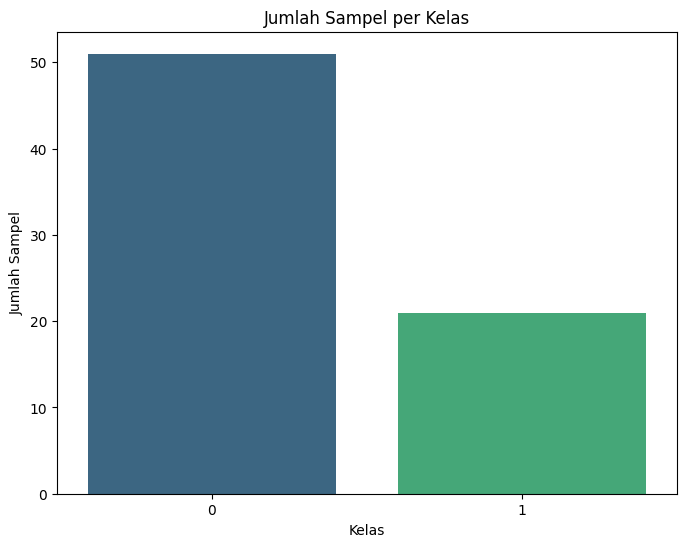

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='ca_cervix', data=data, palette='viridis')
plt.title('Jumlah Sampel per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 1200x1000 with 0 Axes>

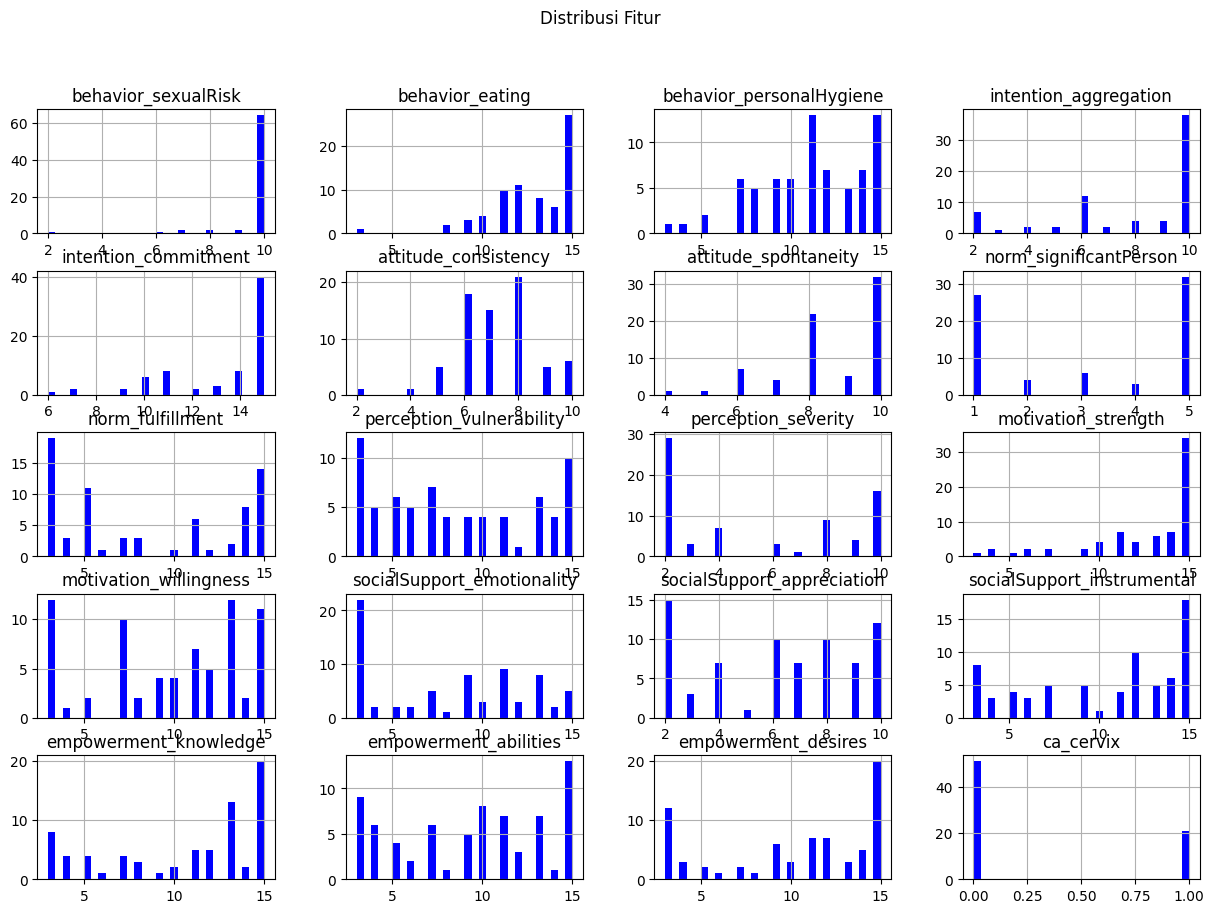

In [ ]:
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

## Struktur Dataset

### Fitur dan Label

fitur merupakan ciri-ciri yang digunakan untuk menentukan klasifikasi suatu data,pada dataset ini fitur yang ada akan berhubungan dan digunakan untuk mengidentifikasi apakah wanita memiliki kanker cervix atau tidak

Fitur pada dataset (19 fitur):

- behavior_sexualRisk(Perilaku Risiko Seksual)

- behavior_eating (Perilaku Makan)

- behavior_personalHygiene (Perilaku Higiene Personal)

- intention_aggregation (Niat Agregasi)

- intention_commitment (Niat Komitmen)

- attitude_consistency (Konsistensi Sikap)

- attitude_spontaneity (Spontanitas Sikap)

- norm_significantPerson (Norma Orang Signifikan)

- norm_fulfillment (Pemenuhan Norma)

- perception_vulnerability (Persepsi Rentan)

- perception_severity (Persepsi Keparahan)

- motivation_strength (Kekuatan Motivasi)

- motivation_willingness (Kesediaan Motivasi)

- socialSupport_emotionality (Dukungan Sosial - Emosionalitas)

- socialSupport_appreciation (Dukungan Sosial - Penghargaan)

- socialSupport_instrumental (Dukungan Sosial - Instrumental)

- empowerment_knowledge (Pemberdayaan - Pengetahuan)

- empowerment_abilities (Pemberdayaan - Kemampuan)

- empowerment_desires (Pemberdayaan - Keinginan)

label merupakan klasifikasi suatu data ,pada data kanker cervix diklasifikasikan menjadi dua yaitu apakah wanita tersebut memiliki kanker cervik atau tidak

Label pada dataset:

Hanya 1 field tapi memiliki 2 type yaitu "0" dan "1"

- 0 : tidak memiliki

- 1 : memiliki

struktur dataset perlu kita ketahui juga untuk mengelola data nantinya,kita perlu megetahui apakah ada berapa data pada dataset,dan ada berapa fitur juga.Karena data dan fitur akan sangat berhubungan dengan model yang akan kita buat nantinya.berikut cara untuk mengetahui struktur data dan penjelasannya.

In [ ]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(72, 20)

Dataset ini memiliki 72 baris dan 20 kolom.

In [ ]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygiene',
       'intention_aggregation', 'intention_commitment', 'attitude_consistency',
       'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
       'perception_vulnerability', 'perception_severity',
       'motivation_strength', 'motivation_willingness',
       'socialSupport_emotionality', 'socialSupport_appreciation',
       'socialSupport_instrumental', 'empowerment_knowledge',
       'empowerment_abilities', 'empowerment_desires', 'ca_cervix'],
      dtype='object')

In [ ]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

behavior_sexualRisk           int64
behavior_eating               int64
behavior_personalHygiene      int64
intention_aggregation         int64
intention_commitment          int64
attitude_consistency          int64
attitude_spontaneity          int64
norm_significantPerson        int64
norm_fulfillment              int64
perception_vulnerability      int64
perception_severity           int64
motivation_strength           int64
motivation_willingness        int64
socialSupport_emotionality    int64
socialSupport_appreciation    int64
socialSupport_instrumental    int64
empowerment_knowledge         int64
empowerment_abilities         int64
empowerment_desires           int64
ca_cervix                     int64
dtype: object

Penjelasan lebih lengkapnya:

behavior_sexualRisk: Mengukur perilaku seksual yang berisiko, seperti jumlah pasangan seksual, penggunaan kontrasepsi, dll.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10

behavior_eating: Mengukur pola makan, seperti frekuensi makan makanan cepat saji, konsumsi sayuran dan buah, dll.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

behavior_personalHygiene: Mengukur kebiasaan kebersihan pribadi, seperti frekuensi mandi, mencuci tangan, dll.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

intention_aggregation: Mengukur niat seseorang untuk berpartisipasi dalam kegiatan kelompok atau sosial.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10

intention_commitment: Mengukur tingkat komitmen seseorang terhadap tujuan atau kegiatan tertentu.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

attitude_consistency: Mengukur seberapa konsisten sikap seseorang dalam berbagai situasi.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10

attitude_spontaneity: Mengukur kecenderungan seseorang untuk bertindak secara spontan atau tanpa perencanaan.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10

norm_significantPerson: Mengukur pengaruh orang penting (misalnya keluarga, teman dekat) terhadap perilaku seseorang.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-5

norm_fulfillment: Mengukur seberapa seseorang merasa harus memenuhi norma-norma sosial.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

perception_vulnerability: Mengukur persepsi seseorang tentang kerentanannya terhadap risiko atau bahaya tertentu.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

perception_severity: Mengukur persepsi seseorang tentang seberapa serius atau parah suatu risiko atau bahaya.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10

motivation_strength: Mengukur kekuatan motivasi seseorang untuk mencapai tujuan atau peruahan perilaku.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

motivation_willingness: Mengukur kesediaan seseorang untuk melakukan tindakan tertentu atau berubah.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

socialSupport_emotionality: Mengukur dukungan emosional yang diterima dari orang lain.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

socialSupport_appreciation: Mengukur tingkat apresiasi atau pengakuan yang diterima dari orang lain.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-10

socialSupport_instrumental: Mengukur dukungan praktis atau bantuan yang diterima dari orang lain.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

empowerment_knowledge: Mengukur tingkat pengetahuan seseorang tentang topik atau situasi tertentu.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

empowerment_abilities: Mengukur kemampuan seseorang dalam menangani atau menghadapi situasi tertentu.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

empowerment_desires: Mengukur keinginan seseorang untuk mengambil tindakan atau mencapai tujuan tertentu.Tipe data yang digunakan adalah Numerical bertipe interval. Data yang diisikan merupakan angka 1-15

ca_cervix: Merupakan label atau target dalam dataset ini yang menunjukkan apakah seseorang didiagnosis dengan kanker serviks (cervical cancer).Tipe data yang digunakan adalah kategorikal bertipe nominal

### Metode Penelitian

Pengambilan data dilakukan dengan memberikan pertanyaan kepada pasien dengan pertanyaan yang saling berhubungan dengan kecenderungan pendetita kanker cervix.Skor diberikan dengan cara yang konsisten untuk memastikan hasil yang dapat diandalkan, meskipun subjektivitas manusia tetap ada.
Penilaian ini tidak didasarkan pada rumus matematis, melainkan pada kriteria kualitatif.Oleh karena itu dalam menentukan interval 1-15 tidak ada rumus khusus untuk menghitungnya. skornya mencerminkan tingkat kecenderungan perilaku dan kebiasaan.

In [ ]:
print(data.iloc[:, 1:10].describe())

       behavior_eating  behavior_personalHygiene  intention_aggregation  \
count        72.000000                 72.000000              72.000000   
mean         12.791667                 11.083333               7.902778   
std           2.361293                  3.033847               2.738148   
min           3.000000                  3.000000               2.000000   
25%          11.000000                  9.000000               6.000000   
50%          13.000000                 11.000000              10.000000   
75%          15.000000                 14.000000              10.000000   
max          15.000000                 15.000000              10.000000   

       intention_commitment  attitude_consistency  attitude_spontaneity  \
count             72.000000             72.000000             72.000000   
mean              13.347222              7.180556              8.611111   
std                2.374511              1.522844              1.515698   
min                6.000

Penjelasan:

- Count (Jumlah) : Jumlah entri non-null dalam setiap kolom.

- Mean (Rata-rata) : Rata-rata dari setiap kolom.

- Std (Standar Deviasi) : Standar deviasi dari setiap kolom, mengukur seberapa tersebar data di sekitar rata-rata.

- Min (Minimum) : Nilai minimum dalam setiap kolom.

- 25% (Kuartil Pertama) : Nilai kuartil pertama (25th percentile) dari setiap kolom, menandakan nilai di bawahnya 25% dari data.

- 50% (Median) : Nilai median (50th percentile) dari setiap kolom, membagi data menjadi dua bagian yang sama.

- 75% (Kuartil Ketiga) : Nilai kuartil ketiga (75th percentile) dari setiap kolom, menandakan nilai di bawahnya 75% dari data.

- Max (Maksimum) : Nilai maksimum dalam setiap kolom.

ketika ingin mengolah data kami perlu untuk untuk mengetahui berapa jumlah data pada setiap label yang ada,sehingga kami tahu apakah perbandingan banyak data pada masing-masing label dapat diterima.

In [ ]:
data.groupby('ca_cervix').size() #untuk mengetahui jumlah masing-masing class

ca_cervix
0    51
1    21
dtype: int64

Pada dataset ini terdapat 51 data dengan class 0 dan 21 data dengan class 1

## Identifikasi Kualitas Data

### Pendeteksian Missing Values

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

- Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan

- Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan. 

- Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

- Mengabaikan dan membuang missing data

- Estimasi parameter

- Imputasi

Kami lakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [ ]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [behavior_sexualRisk, behavior_eating, behavior_personalHygiene, intention_aggregation, intention_commitment, attitude_consistency, attitude_spontaneity, norm_significantPerson, norm_fulfillment, perception_vulnerability, perception_severity, motivation_strength, motivation_willingness, socialSupport_emotionality, socialSupport_appreciation, socialSupport_instrumental, empowerment_knowledge, empowerment_abilities, empowerment_desires, ca_cervix]
Index: []
Missing Value Counts:
behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygiene      0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appre

dari hasil diatas dapat diketahui data tidak memiliki missing value sehingga tidak perlu untuk melakukan inputasi missing value

### Pendeksian Local Outlier Factor(LOF)

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang kita olah memberikan hasil yang baik pada model yang akan kita buat nantinya.outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

### Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier . LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, kita harus mempelajari beberapa konsep secara berurutan:

- K-distance dan K-neighbors

- Reachability Distance (RD)

- Local Reachability Density (LRD)

- Local Outlier Factor (LOF)

K-distance adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

<img src="Gambar/K-distance_K-neighbors.png" width="" align="" />

<img src="Gambar/reachability-distance.webp" width="" align="" />

<img src="Gambar/diagram_reachability-distance.webp" width="" align="" />

Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

Local reachability density (LRD)

<img src="Gambar/rumus_LDR.webp" width="" align="" />

LRD merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

<img src="Gambar/lof_rumus.webp" width="" align="" />

LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

1. Menghitung jarak dan menentukan tetangga

2. Menghitung Reachability Distance (RD)

3. Menghitung Local Reachability Distance (LRD)

4. Menghitung Local Outlier Factor (LOF)

### Implementasi Local Outlier Factor dengan Scikit Learn

sedangkan untuk perhitungan melalui code sebagai berikut :

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
df = pd.read_csv('cervix.csv')
df = df.drop(['Unnamed: 0'], axis=1)
# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

data1 = df
data1 = data1.drop(columns=data1.columns[-1])

# Melakukan prediksi outlier untuk setiap fitur
outlier_indices = []
for column in data1.columns:
    # Mengambil nilai fitur
    feature_values = data1[column].values.reshape(-1, 1)
    # Melakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)
    # Menambahkan indeks outlier ke dalam daftar outlier_indices
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan indeks outlier yang duplikat
outlier_indices = list(set(outlier_indices))

# Menampilkan outlier untuk setiap fitur
# for column in data1.columns:
#     plt.scatter(range(len(data1[column])), data1[column], label=column)
#     plt.scatter(outlier_indices, data1[column].iloc[outlier_indices], color='r', label="Outlier")
#     plt.xlabel("Index")
#     plt.ylabel(column)
#     plt.title(f"Outlier Detection for {column}")
#     plt.legend()
#     plt.show()

# Menampilkan indeks outlier yang ditemukan
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung outlier
outlier_row_indices = [index[0] for index in outlier_indices]

# Menampilkan data pada baris yang mengandung outlier
outlier_data = df.iloc[outlier_row_indices]
print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)


# Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(df))]

# Menghasilkan prediksi outlier berdasarkan outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(df))]

# Menghitung akurasi
precision = precision_score(ground_truth_labels, predicted_labels)

print("==================================== AKURASI ====================================")
print(f"akurasi: {precision}")

===================================== OUTLIER =====================================
outlier ditemukan pada baris => 4, kolom => motivation_willingness
outlier ditemukan pada baris => 29, kolom => socialSupport_emotionality
outlier ditemukan pada baris => 48, kolom => empowerment_abilities
outlier ditemukan pada baris => 14, kolom => behavior_sexualRisk
outlier ditemukan pada baris => 20, kolom => perception_severity
outlier ditemukan pada baris => 29, kolom => perception_severity
outlier ditemukan pada baris => 16, kolom => intention_commitment
outlier ditemukan pada baris => 13, kolom => norm_fulfillment
outlier ditemukan pada baris => 24, kolom => intention_aggregation
outlier ditemukan pada baris => 23, kolom => attitude_consistency
outlier ditemukan pada baris => 9, kolom => empowerment_desires
outlier ditemukan pada baris => 0, kolom => perception_severity
outlier ditemukan pada baris => 57, kolom => socialSupport_emotionality
outlier ditemukan pada baris => 16, kolom => socialSup

pada dasarnya outlier merupakan data yang sangat berbeda dengan data lain,namun pada kasus ini diaman data menggunakan numerical interval maka data tidak perlu diperbaiki karena memang data tidak akan melebihi batasan yang ada,sehingga masih bisa untuk diproses

## Notes

tahap preprocessing tidak perlu dilakukan karena data yang sudah ada sudah dalam keadaan bersih sehingga bis langsung diolah tanpa perlu transformasi dan inputasi mising value.

# Modelling

## Modelling dengan Klasifikasi Gaussian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes

Kita akan menentukan class dari data yang akan kita inputan apakah termasuk class 1(ada)atau 0(tidak).

cara kalkulasi GNB dapat melalui tahap berikut:

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu 

- 80% data train dan 20% data test

- 70% data train dan 30% data test

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya

2. Mengghitung Probabilitas pada data train setiap sheet

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train

ini digunakan untuk menghitung Prior

<img src="Gambar/probabilitas.png" width="" align="" />

3. Menghitung Mean dan Standart dev

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita 

4. membuat inputan

kita akan mengambil satu data acak pada data test kita untuk inputan

5. menghitung Distribusi gausian

lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut

<img src="Gambar/gaussian_naive_bayes.png" width="" align="" />

6. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya :

<img src="Gambar/posterior.png" width="" align="" />

P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

7. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan 

MODEL

berikut model yang telah kita buat untuk mendeteksi kanker payudara

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo 

data = pd.read_csv('cervix.csv')
# Menghapus kolom Id, dikarenakan kurang relevan
# data.drop("unamed column",axis=1,inplace=True)
data.drop("Unnamed: 0",axis=1,inplace=True)

# memisahkan atribut dan label
X = data[['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygiene',
          'intention_aggregation', 'intention_commitment', 'attitude_consistency',
          'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
          'perception_vulnerability', 'perception_severity', 'motivation_strength',
          'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation',
          'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities',
          'empowerment_desires']]

# Target
y = data['ca_cervix']
 
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# membuat model Gaussian naive bayes
gnb_model = GaussianNB()
 
# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)
gnb_model_pkl=gnb_model
y_pred = gnb_model.predict(X_test)

print("=========================== X TRAINING =================================") 
print(X_train)
print("=========================== X TESTING =================================") 
print(X_test)
print("=========================== Y TESTING =================================") 
print(y_test)
print("Data yang akan digunakan adalah")
print(data.iloc[7])
print(data.iloc[26])
print("data yang diinputkan merupakan class=",gnb_model.predict([[8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12]]))
print("data yang diinputkan merupakan class=",gnb_model.predict([[10,13,15,8,13,7,8,3,5,9,2,13,11,12,9,10,12,13,12]]))

=========================== X TRAINING =================================
    behavior_sexualRisk  behavior_eating  behavior_personalHygiene  \
55                   10                9                         8   
70                    9               12                        13   
62                   10               13                        11   
43                   10               15                        15   
4                     8               11                         7   
65                   10               13                        11   
50                   10               11                        15   
2                    10               15                         3   
40                   10               12                        11   
11                   10               15                         8   
3                    10               11                        10   
54                   10               15                        15   
45               

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=0) 
recall = recall_score(y_test, y_pred, pos_label=0)
fscore = f1_score(y_test, y_pred, pos_label=0)

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1) 
recall = recall_score(y_test, y_pred, pos_label=1)
fscore = f1_score(y_test, y_pred, pos_label=1)

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')



Akurasi: 1.00
Presisi: 1.00
Recall: 1.00
F-Score: 1.00
Akurasi: 1.00
Presisi: 1.00
Recall: 1.00
F-Score: 1.00


In [ ]:
print("Data yang akan digunakan adalah")
print(data.iloc[7])
print(data.iloc[26])
print("data yang diinputkan merupakan class=",gnb_model.predict([[8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12]]))
print("data yang diinputkan merupakan class=",gnb_model.predict([[10,13,15,8,13,7,8,3,5,9,2,13,11,12,9,10,12,13,12]]))

Data yang akan digunakan adalah
behavior_sexualRisk            8
behavior_eating               12
behavior_personalHygiene       9
intention_aggregation         10
intention_commitment          10
attitude_consistency           5
attitude_spontaneity          10
norm_significantPerson         5
norm_fulfillment               5
perception_vulnerability       5
perception_severity            2
motivation_strength           10
motivation_willingness         9
socialSupport_emotionality    13
socialSupport_appreciation     2
socialSupport_instrumental     9
empowerment_knowledge          8
empowerment_abilities          7
empowerment_desires           12
ca_cervix                      1
Name: 7, dtype: int64
behavior_sexualRisk           10
behavior_eating               13
behavior_personalHygiene      15
intention_aggregation          8
intention_commitment          13
attitude_consistency           7
attitude_spontaneity           8
norm_significantPerson         3
norm_fulfillment      

Berdasarkan hasil dari pembuatan model Gaussian Naive Bayes dalam prediksi apakah suatu kanker payudara termasuk jinak atau ganas dengan melatih model menggunakan dataset Cervical Cancer Behavior Risk telah memperoleh akurasi sebesar 1.00 atau 100%. Akurasi tersebut dapat dikatakan baik karena berada di atas 85% sehingga pelatihan model yang kami buat dapat dipastikan keakuratannya dalam apakah pasien menderita kanker cervix atau tidak.

Dan juga untuk nilai Presisi, Recall dan F-Score yang masing-masing 1.00 atau 100%, 1.00 atau 100%, 1.00 atau 100% 

Akurasi model tersebut dapat mencapai 100% dikarenakan data yang digunakan sudah dalam keadaan bersih dan telah siap diolah.

Referensi jiawei hen; Micheline Kamber; Jian Pei;. (n.d.). Data Mining Concepts and Techniques,halaman 364-370.

## Modelling dengan stacking

Meskipun pada single model dengan Gaussian Naive Bayes telah mendapatkan akurasi tinggi yaitu 100%. Namun itu masih kurang efektif dikarenakan pada untuk memprediksi hanya dilakukan 1 model saja yaitu dengan model GNB. alih-alih menggunakan 1 model saja akan lebih baik apabila menggunakan banyak model dan nantinya hasil prediksi dari banyak model tersebut dijadikan data baru untuk di masukkan ke dalam meta model sebagai data baru. Untuk melakukan hal tersebut kami akan menggunakan metode ensemble.

Metode ensemble merupakan penggabungan beberapa individual classifier untuk membentuk classifier baru sehingga didapatkan hasil yang lebih akurat. Metode ensemble telah banyak digunakan dalam beberapa penelitian karena terbukti memberikan hasil akurasi yang lebih baik. Dalam metode ensemble, beberapa individual classifier digabungkan dengan tujuan untuk menggabungkan kelebihan dari masing-masing classifier sedemikian rupa sehingga kinerja yang dicapai dalam menyelesaikan tugas menjadi lebih baik. Contoh metode klasifikasi yang umum adalah: bagging, boosting dan stacking. Namun pada kesempatan ini kami hanya menggunakan stacking dan bagging saja untuk peningkatan model.

<img src="Gambar/ensemble_methods.png" width="" align="" />

## Stacking Classifier (Meta Classifier)

Stacking melibatkan penggabungan beberapa model berbeda dan menggunakan model yang lebih tinggi (meta-model) untuk menggabungkan hasil prediksi dari model-model tersebut. Stacking memungkinkan untuk memanfaatkan kekuatan berbagai jenis model.

<img src="Gambar/stacking.png" width="" align="" />

pada stacking kami akan menggunakan model KNN dengan nilai tetangga berbeda-beda sebagai base model kemudian hasil prediksi akan dimasukan ke dalam model GNB sebagai meta model (generalizer) untuk prediksi

### Cara kerja stacking 

1. Base Models (Model Dasar):

    - Model-model dasar (base models) pertama-tama dilatih menggunakan data pelatihan.
    - Setelah dilatih, masing-masing model dasar menghasilkan prediksi.
    - Setelah itu gabungkan hasil prediksi sehingga menjadi data baru dan data tersebut akan menjadi data latih dan uji pada meta model

Model A

kami melatih model KNN dengan nilai K=9

In [ ]:
# KNN 1
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('cervix.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Memisahkan fitur dan label
feature_columns = ['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygiene',
          'intention_aggregation', 'intention_commitment', 'attitude_consistency',
          'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
          'perception_vulnerability', 'perception_severity', 'motivation_strength',
          'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation',
          'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities',
          'empowerment_desires']
X = df[feature_columns].values
y = df['ca_cervix'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=9)

# TRAIN
classifier.fit(X_train, y_train)

# Memprediksi data uji
xtr1 = classifier.predict(X_train)

# TEST
classifier = KNeighborsClassifier(n_neighbors=3)

# Melatih model
classifier.fit(X_test, y_test)

x_baru=[[8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12]]

# Memprediksi data uji
xts1 = classifier.predict(X_test)
xtst_baru=classifier.predict(x_baru)
print ("prediksi untuk data baru: ", xtst_baru)

prediksi untuk data baru:  [0]


Model B

kami melatih model KNN dengan nilai K=5

In [ ]:
# KNN 2
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('cervix.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Memisahkan fitur dan label
feature_columns = ['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygiene',
          'intention_aggregation', 'intention_commitment', 'attitude_consistency',
          'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
          'perception_vulnerability', 'perception_severity', 'motivation_strength',
          'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation',
          'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities',
          'empowerment_desires']
X = df[feature_columns].values
y = df['ca_cervix'].values
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier2 = KNeighborsClassifier(n_neighbors=5)

# TRAIN
classifier2.fit(X_train, y_train)

# Memprediksi data uji
xtr2 = classifier2.predict(X_train)

# TEST
classifier2 = KNeighborsClassifier(n_neighbors=5)

# Melatih model
classifier2.fit(X_test, y_test)
x_baru=[[8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12]]

# Memprediksi data uji
xts2 = classifier2.predict(X_test)
xtst2_baru=classifier2.predict(x_baru)
print(xtst2_baru)

[0]


Setelah itu, gabungkan hasil prediksi dari kedua model menjadi sebuah dataset baru

In [ ]:
# MODEL A
combined_df = pd.DataFrame({
    'X1': xtr1,
    'X2': xtr2,
    'Y': y_train
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_train.csv', index=False)

In [ ]:
# MODEL B
combined_df = pd.DataFrame({
    'X1': xts1,
    'X2': xts2,
    'Y': y_test
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_test.csv', index=False)

In [ ]:
df = pd.read_csv('combine_train.csv')
df.head()

,X1,X2,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,1,1


In [ ]:
df2 = pd.read_csv('combine_test.csv')
df2.head()

,X1,X2,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


2. Generalizer (Meta-Model):

- Prediksi dari model-model dasar ini kemudian digunakan sebagai fitur (input) untuk melatih model baru yang disebut generalizer atau meta-model.

- Generalizer ini akan belajar dari kombinasi prediksi-prediksi model dasar untuk membuat keputusan akhir yang lebih baik.

In [ ]:
# GNB
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menggabungkan prediksi dari kedua model KNN sebagai fitur baru
f_meta = np.column_stack((xtr1, xtr2))
X_test = np.column_stack((xts1, xts2))

# Inisialisasi dan pelatihan meta-classifier Naive Bayes
meta_classifier = GaussianNB()
meta_classifier.fit(f_meta, y_train)
predict = meta_classifier.predict(X_test)

print(classification_report(predict, y_test))
print(meta_classifier.predict([[0,0]]))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.00      0.00      0.00         0

    accuracy                           0.93        15
   macro avg       0.50      0.47      0.48        15
weighted avg       1.00      0.93      0.97        15

[0]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/pyt

### Implementasi stacking dengan scikit-learn

setelah kita mengetahui proses dari stacking classifier untuk meningkatkan model secara manual, berikutnya kami akan menggunakan bantuan library untuk membantu melatih model dasar, karena kami tidak mungkin melatih model dasar satu persatu, karena kami akan menggunakan 20 model knn sebagai model dasar dengan pembeda adalah nilai K. Dan nantinya prediksi 20 model tersebut akan dimasukkan ke dalam model gaussian naive bayes.

Accuracy of knn1: 0.9333
Accuracy of knn2: 0.9333
Accuracy of knn3: 0.9333
Accuracy of knn4: 0.9333
Accuracy of knn5: 1.0000
Accuracy of knn6: 0.9333
Accuracy of knn7: 0.9333
Accuracy of knn8: 0.8667
Accuracy of knn9: 0.8667
Accuracy of knn10: 0.9333


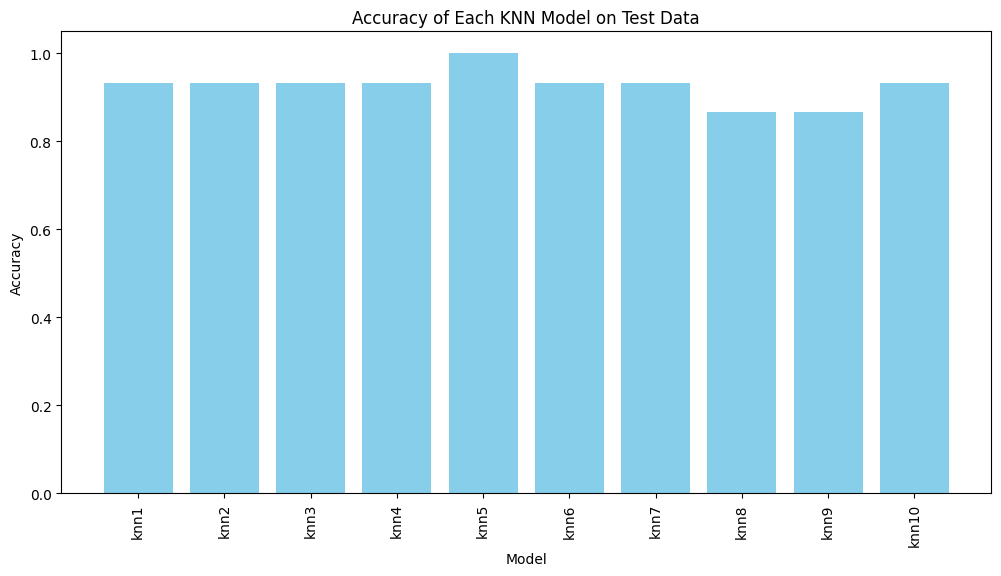

Prediction of knn1: 0
Prediction of knn2: 0
Prediction of knn3: 0
Prediction of knn4: 0
Prediction of knn5: 0
Prediction of knn6: 0
Prediction of knn7: 0
Prediction of knn8: 0
Prediction of knn9: 0
Prediction of knn10: 0


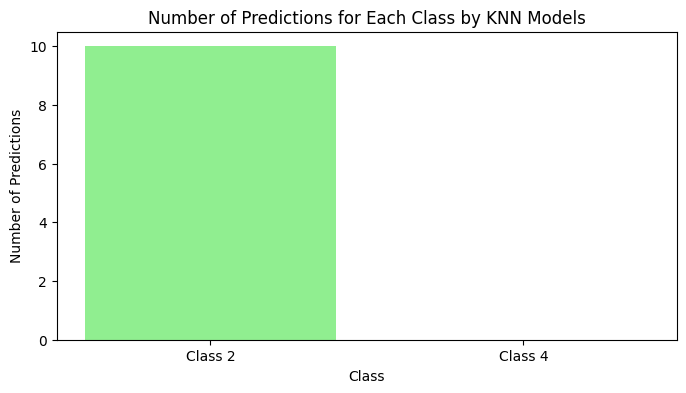


Prediction for X_new: 0

Overall Stacking Classifier Performance:
Accuracy: 0.9333


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('cervix.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Separate features and labels
feature_columns = ['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygiene',
          'intention_aggregation', 'intention_commitment', 'attitude_consistency',
          'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
          'perception_vulnerability', 'perception_severity', 'motivation_strength',
          'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation',
          'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities',
          'empowerment_desires']
X = df[feature_columns].values
y = df['ca_cervix'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create list of estimators for StackingClassifier
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 33, 3)]

# Initialize StackingClassifier with GaussianNB as final estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Train StackingClassifier
clf.fit(X_train, y_train)

# Evaluate accuracy for each KNN model and store the results
accuracies = []
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    accuracies.append(accuracy)

# Plotting the accuracy of each KNN model
model_names = [name for name, _ in estimators]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each KNN Model on Test Data')
plt.xticks(rotation=90)
plt.show()

# Evaluate predictions for new data point by each KNN model
X_new = [[10,13,15,8,13,7,8,3,5,9,2,13,11,12,9,10,12,13,12]]
predictions = {}
for name, estimator in estimators:
    pred = estimator.predict(X_new)[0]
    predictions[name] = pred
    print(f"Prediction of {name}: {pred}")

# Counting predictions for each class
count_class_2 = sum(1 for pred in predictions.values() if pred == 0)
count_class_4 = sum(1 for pred in predictions.values() if pred == 1)

# Plotting the number of predictions for each class
plt.figure(figsize=(8, 4))
plt.bar(['Class 2', 'Class 4'], [count_class_2, count_class_4], color=['lightgreen', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by KNN Models')
plt.show()

# Predict for new data using StackingClassifier
prediction = clf.predict(X_new)

print(f'\nPrediction for X_new: {prediction[0]}')

# Evaluate overall performance of the stacking classifier
avg_acc = clf.score(X_test, y_test)
print(f'\nOverall Stacking Classifier Performance:')
print(f'Accuracy: {avg_acc:.4f}')

# Obtain predictions from the model
y_pred = clf.predict(X_test)


## Bagging (Bootstrap Aggregating)

Bagging melibatkan pembuatan beberapa subset dari data pelatihan dengan penggantian (bootstrap) dan melatih model yang berbeda pada setiap subset. Kemudian, hasil prediksi dari model-model ini diambil rata-rata (untuk regresi) atau diambil mayoritas (untuk klasifikasi).

<img src="Gambar/bagging.png" width="" align="" />

Metode bagging bertujuan untuk mengatasi variasi dan overfitting dalam model-machine learning. Bagging melibatkan langkah-langkah berikut:

1. Mengambil dataset pelatihan awal yang dimiliki.

2. Membuat beberapa set data pelatihan yang berbeda dengan cara mengambil sampel secara acak dari dataset awal. Setiap set data ini mungkin memiliki beberapa data yang sama dan beberapa yang berbeda.

3. Model yang sama (classifier) diterapkan pada setiap set data pelatihan ini dan menghasilkan prediksi masing-masing.

4. Hasil prediksi dari semua classifier digabungkan.

Metode bagging membantu mengurangi variabilitas dalam prediksi karena setiap set data pelatihan memiliki variasi yang berbeda. Variasi ini membuat model lebih stabil dan lebih baik kinerjanya daripada hanya menggunakan satu set data pelatihan saja.

pada bagging kami menggunakan 20 gaussian naive bayes yang menerima subset berbeda satu sama lain 

Data baru yang akan diprediksi
   behavior_sexualRisk  behavior_eating  behavior_personalHygiene  \
0                   10               13                        15   

   intention_aggregation  intention_commitment  attitude_consistency  \
0                      8                    13                     7   

   attitude_spontaneity  norm_significantPerson  norm_fulfillment  \
0                     8                       3                 5   

   perception_vulnerability  perception_severity  motivation_strength  \
0                         9                    2                   13   

   motivation_willingness  socialSupport_emotionality  \
0                      11                          12   

   socialSupport_appreciation  socialSupport_instrumental  \
0                           9                          10   

   empowerment_knowledge  empowerment_abilities  empowerment_desires  
0                     12                     13                   12  

Estimator 1 accura

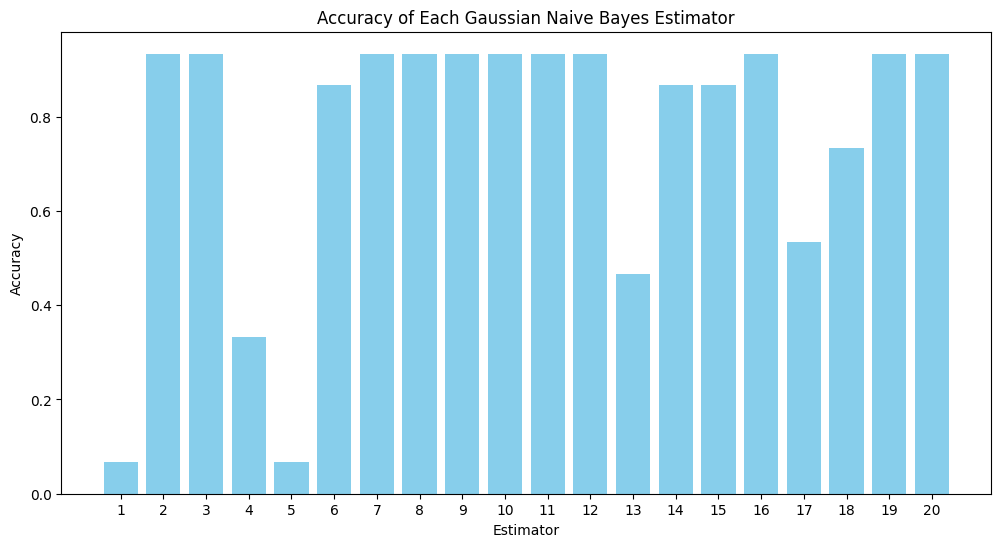

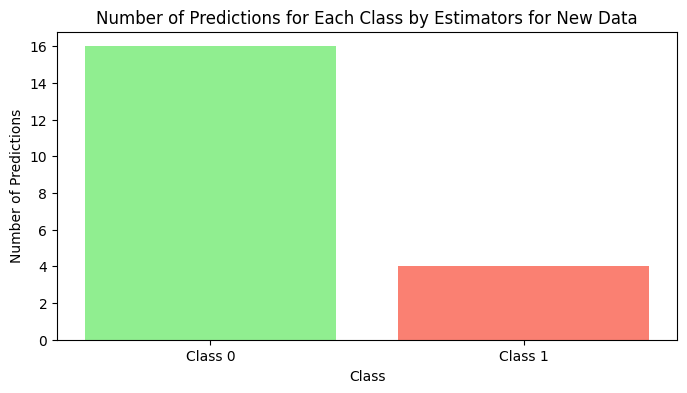

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Memuat data
data = pd.read_csv('cervix.csv')

# Menghapus kolom yang tidak relevan
data.drop("Unnamed: 0", axis=1, inplace=True)

# Memisahkan atribut dan label
X = data[['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygiene',
          'intention_aggregation', 'intention_commitment', 'attitude_consistency',
          'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
          'perception_vulnerability', 'perception_severity', 'motivation_strength',
          'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation',
          'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities',
          'empowerment_desires']]
y = data['ca_cervix']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Parameter bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Inisialisasi list untuk menyimpan model dan akurasi
estimators = []
accuracies = []
pred = []

# Data baru yang ingin diprediksi
X_new = pd.DataFrame([[10, 13, 15, 8, 13, 7, 8, 3, 5, 9, 2, 13, 11, 12, 9, 10, 12, 13, 12]], 
                      columns=['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygiene',
                               'intention_aggregation', 'intention_commitment', 'attitude_consistency',
                               'attitude_spontaneity', 'norm_significantPerson', 'norm_fulfillment',
                               'perception_vulnerability', 'perception_severity', 'motivation_strength',
                               'motivation_willingness', 'socialSupport_emotionality', 'socialSupport_appreciation',
                               'socialSupport_instrumental', 'empowerment_knowledge', 'empowerment_abilities',
                               'empowerment_desires'])
print("Data baru yang akan diprediksi")
print(X_new)
print()
np.random.seed(0)

# Membuat model Gaussian Naive Bayes untuk setiap subset
for i in range(n_estimators):
    # Membuat bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    
    # Melatih model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)
    
    # Evaluasi model    
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Mengambil nilai prediksi dan menyimpannya di list pred
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy : {accuracy:.4f}")
    print(f"Estimator {i + 1} memprediksi : {int(bebas[0])}")
    print()

# Majority vote untuk prediksi data baru
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {pred_majority_vote}")

# Menghitung jumlah dari masing-masing kelas dalam pred
class_counts = np.bincount(pred, minlength=2) #2 karena kelas ada 2 (0 dan 1)
print(f"Jumlah prediksi kelas 0: {class_counts[0]}")
print(f"Jumlah prediksi kelas 1: {class_counts[1]}")

# Menghitung rata-rata akurasi dari semua estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")

# Plot accuracy untuk tiap estimator
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_estimators + 1), accuracies, color='skyblue')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Gaussian Naive Bayes Estimator')
plt.xticks(range(1, n_estimators + 1))
plt.show()

# Plot the number of predictions pada setiap klass untuk data baru 
class_labels = ['Class 0', 'Class 1']
class_values = [class_counts[0], class_counts[1]]
plt.figure(figsize=(8, 4))
plt.bar(class_labels, class_values, color=['lightgreen', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by Estimators for New Data')
plt.show()


## Evaluasi

Dari ketiga yang kami buat sebelumnya dapat dikatakan ada beberapa yang baik, hal itu dapat dilihat dari akurasi yang didapat dari masing-masing model, yaitu

single model dengan GNB : mendapatkan akurasi 100%
stacking dengan KNN (model dasar) dan GNB (model meta) : mendapatkan akurasi 93%
bagging dengan GNB : mendapatkan akurasi 75%
dari ketiga model diatas dapat dilihat bahwa model terbaik adalah stacking classifier karena mendapatkan akurasi tertinggi dari ketiga model yang telah dibuat

## Deployment

Setelah kami membuat model maka tahap selanjutnya adalah melakukan deployment untuk model kita. Hal ini bertujuan supaya model yang kita gunakan dapat digunakan oleh tenaga medis dalam pengklasifikasikan suatu kanker payudara termasuk jinak atau ganas. 

Library yang kami gunakan adalah flask dalam mengintegrasikan model kami menjadi sebuah web

## Menyimpan model

pada tahap ini kami akan menyimpan model dari stacking classifier yang sudah dibuat. Tujuan dilakukan penyimpanan model adalah supaya mudah dipanggil ketika akan memasuki tahap deployment. 

Untuk library yang kami gunakan dalam menyimpan model yaitu pickle.

In [ ]:
import pickle

# Menyimpan model ke dalam file 'stacking_classifier.pkl'
with open('cervix_gnb.pkl', 'wb') as file:
    pickle.dump(gnb_model, file)

# Integrasi model dengan web

1. install library flask, dengan menjalankan perintah "pip install flask"

2.membuat file berekstensi .py, misal app.py. Nantinya aplikasi ini akan menjadi logic atau controller dari web kita.

3.didalam app.py kita panggil model yang telah kita simpan, kemudian kita tambahkan beberapa route dan logic untuk aplikasi web kita.
4. setelah itu kita membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi.
Source code yang telah kami buat dapat diakses melalui link berikut :


https://github.com/ReEkaF/cervix

## Hasil web

link menuju website yang sudah kami buat  

http://cervix.bmcwaterpool.my.id

Berikut adalah form untuk user menginputkan data yang ingin diprediksi oleh model

<img src="Gambar/Cervical-Cancer-Prediction-Input-Data.png" width="" align="" />

ketika user selesai menginputkan data dan menekan tombol "predict", maka user akan diarahkan ke halaman hasil prediksi

<img src="Gambar/Cervical-Cancer-Prediction-Result.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=629612f5-83ff-42ee-a6c8-03ea053bc570' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>